## Выполнили: Кумин Алексей, Ананченко Андрей, Минеев Илья
# Часть первая. Исследование маятника
## 1) Необходимые библиотеки:

In [23]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sympy import *

## 2) Функция нахождения состояний равновесия и их типа
(для системы из двух ДУ первого порядка(f1, f2) )

In [24]:
from scipy.optimize import fsolve
from scipy.misc import derivative

def partial_derivative(func, var , point):
    args = point
    def wraps(x):
        args[var] = x
        return func(args)
    return derivative(wraps, point[var], dx = 1e-5)

def eigs_and_equi(pendulum1):
    pendulum = lambda v: pendulum1(1, v)
    found_roots = []
    for crd in np.linspace(0, 2*np.pi, 6):
        root = fsolve(pendulum, (crd, 0))
        for found_root in found_roots:
            if np.linalg.norm(root - found_root) < 0.01:
                break
        else:
            found_roots.append(root)
    equis = []
    for i in found_roots:
        part_der_z = partial_derivative(pendulum, 0 , i)
        part_der_x = partial_derivative(pendulum, 1 , i)
        
        jac = np.transpose( np.array([part_der_z, part_der_x], dtype=complex) )
        
        eigs = (np.linalg.eig(jac))[0]
        if not np.isnan(eigs[0]) or not np.isnan(eigs[1]):
            if eigs[0].imag == 0 and eigs[1].imag == 0:
                if eigs[0].real < 0 and eigs[1].real < 0: 
                    equis.append([i, "stable knot"])
                elif eigs[0].real > 0 and eigs[1].real > 0:
                    equis.append([i, "unstable knot"])
            else:
                if eigs[0].real < 0 and eigs[1].real < 0: 
                    equis.append([i, "stable focus"])
                elif eigs[0].real > 0 and eigs[1].real > 0:
                    equis.append([i, "unstable focus"])
            if eigs[0].real == 0 and eigs[1].real == 0:
                equis.append([i, "center"])
            elif eigs[0].real > 0 and eigs[1].real < 0:
                equis.append([i, "saddle equilibrium"])
            elif eigs[0].real < 0 and eigs[1].real > 0:
                equis.append([i, "saddle equilibrium"])
        else:
            equis.append([i, "eigen is Nan"])
    return equis


## 3) Функция для отрисовки фазового портрета, изоклин и состояний равновесия

In [25]:
def plotDE2(pendulum, eigs):
    x1, y1 = np.linspace(0, 2 * np.pi, 1000), np.linspace(-4, 4, 1000)
    X, Y = np.meshgrid(x1, y1)
    UV = pendulum(1, [X, Y])
    plt.streamplot(X, Y, UV[0], UV[1])
    for i in eigs:
        sc = plt.scatter(i[0][0], i[0][1],color='red', s=40, marker='o')
        
    cont1 = plt.contour(X, Y, UV[0], [0])
    cont2 = plt.contour(X, Y, UV[1], [0])

    plt.xlabel(r'Z')
    plt.ylabel(r'X')
    plt.title(r'$Phase$ $portreit$', fontsize = 20)
    
    plt.clabel(cont2, cont2.levels, fmt="G0", fontsize=20)
    plt.clabel(cont1, cont1.levels, fmt="Ginf", fontsize=20)

    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    return fig

## 4) Функция для отрисовки осциллограмм

In [26]:
from scipy.integrate import solve_ivp
def plotTime(pendulum, tstr, ic):
   
    result = solve_ivp(pendulum ,tstr, ic,
                   t_eval=np.linspace(tstr[0], tstr[1], 250))
    plt.plot(result.t, result.y[0], result.t, result.y[1])
    plt.legend([r'$z-angle$', r'$x-speed$'], fontsize=20)
    plt.xlabel(r'time (s)')
    plt.title(r"$Oscillogram$", fontsize = 20)
    plt.grid()
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    return fig, result

## 5) Функция, определяющая подходит управление или нет

In [27]:
def opti(eigs):
    ret = "u_control is not suitable"
    if eigs:
        count_stable_equis = 0
        for i in eigs:
            if i[1] == "stable focus" or i[1] == "stable knot":
                count_stable_equis += 1
            if np.abs(i[0][0] - np.pi) < 0.01 and np.abs(i[0][1] - 0) < 0.01:
                if i[1] == "stable focus" or i[1] == "stable knot":
                    ret = "u_control is suitable"
                else:
                    ret = "u_control is not suitable"
        if count_stable_equis != 1:
            ret = "u_control is not suitable"
            
    return ret


## 6) Анимация маятника

In [28]:
from matplotlib import animation

def anim_pendulum(result):
    fig, ax = plt.subplots()
    ax.set_xlim((-1.5, 1.5))
    ax.set_ylim((-1.5, 1.5))    
    ax.set_aspect('equal')
    ax.grid()

    line, = ax.plot([], [], 'o-')
    def update(i):
        angle = result.y[0][i]
        x = np.sin(angle)
        y = -np.cos(angle)
        line.set_data([0, x], [0, y])
        return (line,)
    fig1 = plt.gcf()
    fig1.set_size_inches(10, 6)
    return animation.FuncAnimation(fig, update, np.arange(1, len(result.y[0])), interval=10, save_count=1000)

## 7) Система функций маятника и управляющая функция
z - угол отклонения, x - угловая скорость
* Вывод состояний равновесия
* Решение о принятии управляющей функции
* Фазовый портрет с изоклинами
* Осцилограмма системы функций

### Вывод системы и ее исследование:
![scr1.jpg](scr1.jpg)
![scr2.jpg](scr2.jpg)
![scr3.jpg](scr3.jpg)
![scr4.jpg](scr4.jpg)
![scr5.jpg](scr5.jpg)

[[array([1.e-05, 1.e-05]), 'saddle equilibrium'], [array([3.14160265e+00, 1.00000000e-05]), 'stable focus'], [array([6.28319531e+00, 1.00000000e-05]), 'saddle equilibrium']]
u_control is suitable


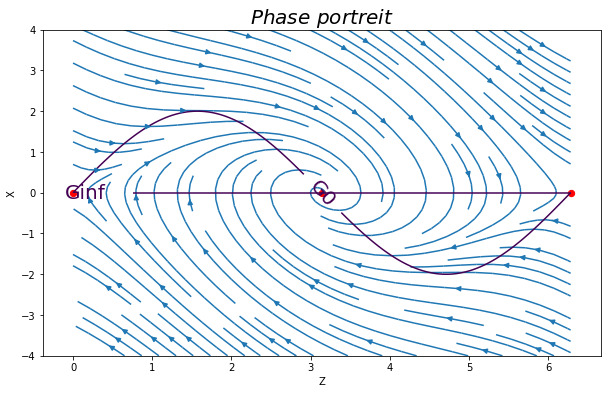

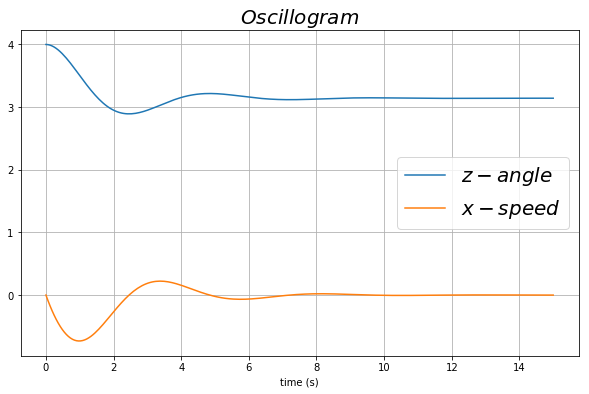

pendulum animation:


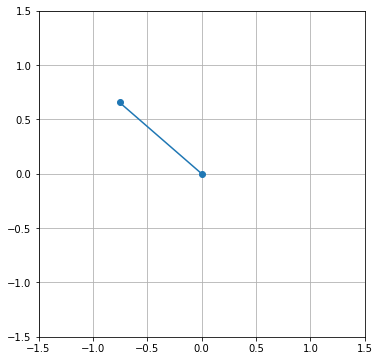

In [46]:
from IPython.display import HTML
from matplotlib.backends.backend_pdf import PdfPages

def u_zero(v):
    return 0

def u_control(a, v):
    z, x = v
    return  2 * a *np.sin(z)

def parametrized_pendulum(a, b, u_func):
    def pendulum(t, v):
        z, x = v
        return np.array([
            x,
            -a*np.sin(z) - b*x + u_func(a, v)
        ])
    return pendulum

pendulum = parametrized_pendulum(2, 1, u_control)
eigs = eigs_and_equi(pendulum)
print(eigs)
resp = opti(eigs)
print(resp)

pp = PdfPages('applies for lab/foo1.pdf')

fig1 =plotDE2(pendulum, eigs)
pp.savefig(fig1)
plt.show()

fig2, res = plotTime(pendulum, np.array([0, 15]), np.array([4, 0]))
pp.savefig(fig2)
plt.show()

pp.close()

anim = anim_pendulum(res)
print("pendulum animation:")
video = HTML(anim.to_html5_video())
display(video)
anim.save(resp + '1.mp4')

# Часть вторая. Маятник на тележке
## 1) Отрисовка осциллограмм для линеаризованной системы 


In [32]:
from scipy.integrate import solve_ivp

def plot_time_lin(pendulum, tstr, init_cond):
    result = solve_ivp(pendulum ,tstr, init_cond,
                   t_eval=np.linspace(tstr[0], tstr[1], 150))

    plt.plot(result.t, result.y[0], result.t, result.y[1], result.t, result.y[2], result.t, result.y[3])
    plt.legend([r'$x1$', r'$x2$', r'$x3$', r'$x4$'], fontsize=20)
    plt.xlabel(r'time (s)')
    plt.title(r"$Oscillograms$", fontsize = 20)
    plt.grid()
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    return fig, result

## 2) Проверка управления

In [33]:
from scipy.misc import derivative

def partial_derivative1(func, var , time, point):
    args = point
    def wraps(x):
        args[var] = x
        return func(time, args)
    return derivative(wraps, point[var], dx = 1e-5)

point = np.array([0.0, 0.0, 0.0, 0.0], dtype = float)

def Jacobian(system):
    jac = partial_derivative1(system, 0, 1, point)
    for i in range(1, 4):
        jac = np.vstack((jac, partial_derivative1(system, i, 1, point)))
    jac = jac.transpose() # Якобиан
    jac = jac.astype(np.float32, copy=False)
    return jac

def calculate_coeff(jac):
    coeff_of_char_poly = np.array([1., 0., 0., 0., 0.], dtype = float)
    coeff_of_char_poly[1] = - np.trace(jac)
    coeff_of_char_poly[4] = np.linalg.det(jac)
    coeff_of_char_poly[2] = (np.linalg.det(jac[0:2, 0:2]) + np.linalg.det(jac[1:3, 1:3]) + np.linalg.det(jac[2:4, 2:4]))
    coeff_of_char_poly[3] = -np.linalg.det(jac[0:3,0:3]) - np.linalg.det(jac[1:4,1:4])
    return coeff_of_char_poly

def Routh_Hurwitz_crit(a):
    ret = "control is not suitable, equals is unstable or difficult"
    
    Routh_Hurwitz_matrix = np.array([
        [a[1], a[3], 0.  , 0.  ],
        [a[0], a[2], a[4], 0.  ],
        [0.  , a[1], a[3], 0.  ],
        [0.  , a[0], a[2], a[4]],
    ])
    for i in a:
        if i <= 0:
            return Routh_Hurwitz_matrix, ret
    det3 = np.array([
        [a[1], a[3], 0.  ],
        [a[0], a[2], a[4]],
        [0.  , a[1], a[3]],
    ])    
    minors = np.array([
        a[1],
        np.linalg.det(det3)
    ])
    
    for i in minors:
        if i <= 0:
            return Routh_Hurwitz_matrix, ret
        
    return Routh_Hurwitz_matrix, "control is suitable"
    

def suitable_control(system):    
    jac = Jacobian(system)
    print("Jacobian - ")
    print(jac)
    
    a = calculate_coeff(jac)
    print("coeff of char poly - " , a)
    
    RH_matrix , ret = Routh_Hurwitz_crit(a)
    print("Routh-Hurwitz matrix -")
    print(RH_matrix)
    
    return ret

## 3) Фазовое пространство для маятника в точке (0, 0)

In [34]:
def pendulum_ret(system):
    def pendulum(t, x):
        ret = system(t, [0.0, 0.0, x[0], x[1]])
        return np.array([
            ret[2],
            ret[3],
        ])
    return pendulum

def streamploat_pendulum(system, size_x3, size_x4):
    fig1, ax = plt.subplots()
    X, Y = np.meshgrid(size_x3, size_x4)
    pendulum = pendulum_ret(system)
    UV = pendulum(1, (X, Y))
    plt.streamplot(X, Y, UV[0], UV[1])
    plt.scatter(0, 0,color='red', s=40, marker='o')
    #cont1 = plt.contour(X, Y, UV[0], [0])
    #cont2 = plt.contour(X, Y, UV[1], [0])

    plt.xlabel(r'x3')
    plt.ylabel(r'x4')
    plt.title(r'$Phase$ $portreit$ $pendulum$', fontsize = 20)
    
    #plt.clabel(cont2, cont2.levels, fmt="G0", fontsize=20)
    #plt.clabel(cont1, cont1.levels, fmt="Ginf", fontsize=20)
    
    fig1 = plt.gcf()
    fig1.set_size_inches(10, 6)
    return fig1

## 4) Фазовое пространство для тележки в точке (0, 0)

In [35]:
def car_ret(system, fix_x3):
    def car(t, x):
        ret = system(t, [x[0], x[1], fix_x3 * np.ones(x[1].shape), 0.0])
        return np.array([
            ret[0],
            ret[1] * np.ones(x[1].shape),
        ])
    return car

def streamploat_car(system, size_x1, size_x2, fix_x3):
    fig2, ax = plt.subplots()
    X, Y = np.meshgrid(size_x1, size_x2)
    car = car_ret(system, fix_x3)
    UV = car(1, (X, Y))
    plt.streamplot(X, Y, UV[0], UV[1])
    plt.scatter(0, 0, color='red', s=40, marker='o')
    #cont1 = plt.contour(X, Y, UV[0], [0])
    #cont2 = plt.contour(X, Y, UV[1], [0])

    plt.xlabel(r'X1')
    plt.ylabel(r'X2')
    plt.title(r'$Phase$ $portreit$ $car$', fontsize = 20)
    
    #plt.clabel(cont2, cont2.levels, fmt="G0", fontsize=20)
    #plt.clabel(cont1, cont1.levels, fmt="Ginf", fontsize=20)
    
    fig2 = plt.gcf()
    fig2.set_size_inches(10, 6)
    return fig2

## 5) Анимация маятника на каретке


In [47]:
def system_anim(result):
    fig, ax = plt.subplots()
    ax.set_xlim((-5, 5))
    ax.set_ylim((-1.5, 1.5))    
    ax.set_aspect('equal')
    ax.grid()

    quad, = ax.plot([],[], marker='s', markersize=40, markeredgecolor='k',markeredgewidth=2)
    line, = ax.plot([], [], 'o-')
    def update(i):
        angle = result.y[2][i]
        axes_car = result.y[0][i]
        quad.set_data([axes_car], [0])
        x1 = np.sin(angle)
        y1 = np.cos(angle)
        line.set_data([axes_car, x1 + axes_car], [0, y1])
        return (line, quad,)
    len(result.y[0])
    fig1 = plt.gcf()
    fig1.set_size_inches(10, 6)
    return animation.FuncAnimation(fig, update, np.arange(1, len(result.y[0])), interval=25, save_count=1000)

## 6) Система
при заданных параметрах m=1, M=10, l=10 имеем:
![scr6.jpg](scr6.jpg)

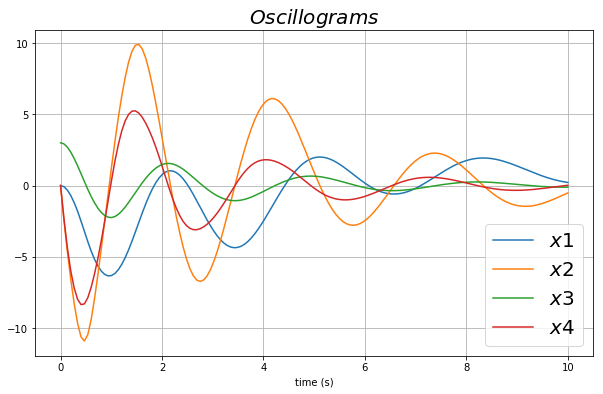

Jacobian - 
[[  0.    1.    0.    0. ]
 [  0.1   0.1 -14.   -1. ]
 [  0.    0.    0.    1. ]
 [  0.1   0.1  -4.   -1. ]]
coeff of char poly -  [1.         0.89999998 3.9000001  1.         1.        ]
Routh-Hurwitz matrix -
[[0.89999998 1.         0.         0.        ]
 [1.         3.9000001  1.         0.        ]
 [0.         0.89999998 1.         0.        ]
 [0.         1.         3.9000001  1.        ]]
control is suitable


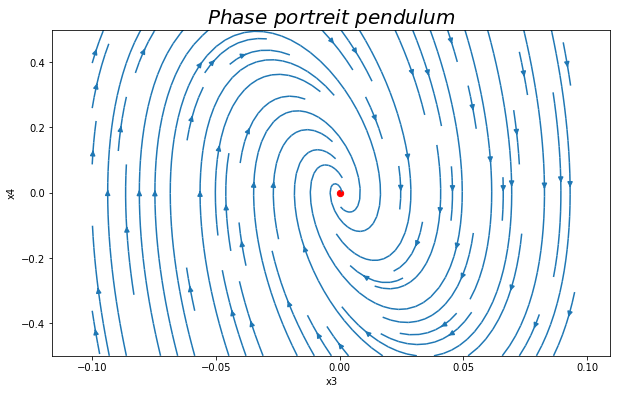

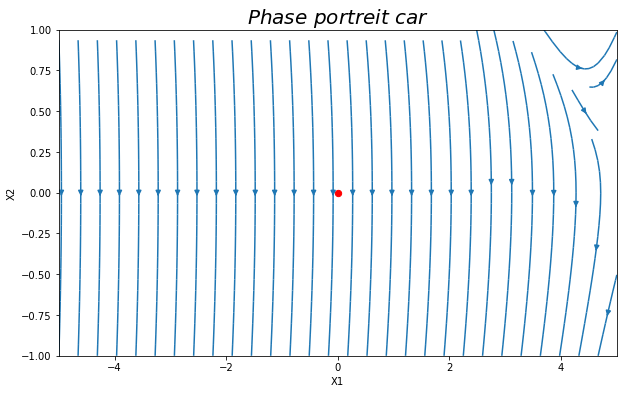

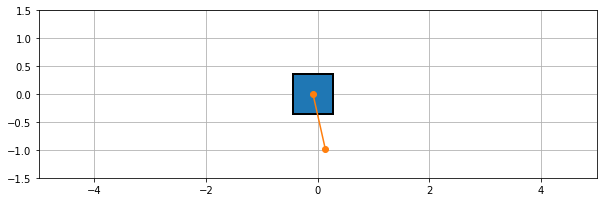

In [49]:
def u_zero(x):
    return 0
def u_control(x):     
    a = 1
    b = 1
    c = -150
    d = -10    
    return a*x[0] + b*x[1] + c*x[2] + d*x[3]

def parametrized_pendulum(m, M, g, l, u_func):
    def pendulum(t, x):
        d = (m + M) - m*np.cos(x[2])
        return np.array([
            x[1],
            (m*(g - l*x[3]**2)*np.sin(x[2]) + u_func(x))/d,
            x[3],
            ((g*(m+M)/l - m*x[3]**2)*np.sin(x[2]) + u_func(x)/l)/d
        ])
    return pendulum

def lin_parametrized_pendulum(mu, u_func):
    def lin_pendulum(t, x):
        return np.array([
            x[1],
            mu*x[2] + u_func(x),
            x[3],
            (1+mu)*x[2] + u_func(x)
        ])
    return lin_pendulum

pendulum = parametrized_pendulum(1, 10, 10, 1, u_control)
lin_pendulum = lin_parametrized_pendulum(1.5, u_control)

pp = PdfPages('applies for lab/foo2.pdf')
fig1, res = plot_time_lin(pendulum, np.array([0, 10]), np.array([0., 0., 3, 0]))
pp.savefig(fig1)
plt.show()

suit = suitable_control(pendulum)
print(suit)

fig2 = streamploat_pendulum(lin_pendulum, np.linspace(-0.1, 0.1, 1000), np.linspace(-0.5, 0.5, 1000))
pp.savefig(fig2)
plt.show()

fig3 = streamploat_car(lin_pendulum, np.linspace(-5, 5, 1000), np.linspace(-1, 1, 1000), 0.035)
pp.savefig(fig3)
plt.show()
pp.close()

anim = system_anim(res)
video = HTML(anim.to_html5_video())
display(video)
anim.save(suit + '2.mp4')